# Whether the person heart disease or not based on some indipendent variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.shape

(270, 14)

In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

# If have then
df.fillna(method="bfill",axis=0,inplace=True)
df["Sex"].fillna(method="ffill",axis=0,inplace=True)

In [7]:
df["Heart Disease"].value_counts() # Heart Disease is our taget varable

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

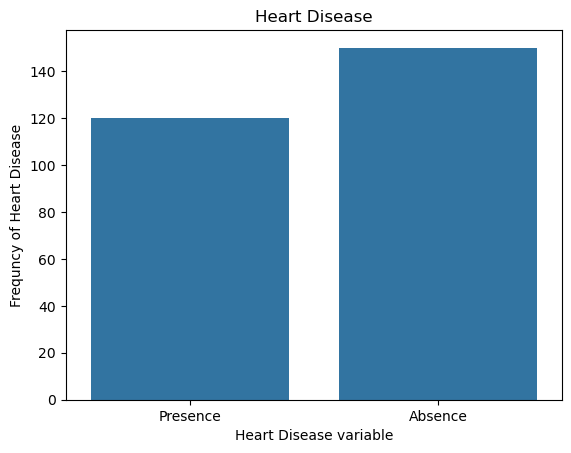

In [11]:
sns.countplot(x="Heart Disease",data=df)
plt.xlabel("Heart Disease variable")
plt.ylabel("Frequncy of Heart Disease")
plt.title("Heart Disease")
plt.show()

here x is the taring feature.So we are going to drop Heart Disease.Because Heart Disease is our target variable.so x our traning variable and y is our target variable

In [13]:
x=df.drop(columns=["Heart Disease"]) # x= df.iloc[:,:-1] all columns: except the last one(:-1)
y=df["Heart Disease"] # y=df.iloc[:,:-1]all rows(:),except the last one(:-1)


In [14]:
x.shape

(270, 13)

In [15]:
y.shape

(270,)

In [ ]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(216, 13) (54, 13) (216,) (54,)


In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 13,criterion="gini")
dt.fit(x_train, y_train)


DecisionTreeClassifier(random_state=13)

In [44]:
dt.feature_importances_

array([0.15060518, 0.03998935, 0.09362686, 0.07803616, 0.10412964,
       0.        , 0.01262272, 0.02208976, 0.        , 0.07173251,
       0.01420056, 0.1753796 , 0.23758766])

In [45]:
y_pred=dt.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence'],
      dtype=object)

In [47]:
from sklearn.metrics import confusion_matrix # to check the accuracy
confusion_matrix(y_test,y_pred)


array([[22,  4],
       [ 9, 19]])

# To print the overall acuuracy of the model

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.7592592592592593

In [50]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Absence       0.71      0.85      0.77        26
    Presence       0.83      0.68      0.75        28

    accuracy                           0.76        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54



In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(dt,x_train,y_train,cv=10)

array([0.86363636, 0.86363636, 0.68181818, 0.63636364, 0.68181818,
       0.63636364, 0.85714286, 0.71428571, 0.76190476, 0.80952381])

# Another easy steps

In [54]:
dt.predict(x_test)

array(['Absence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence'],
      dtype=object)

In [55]:
dt.score(x_test,y_test)

0.7592592592592593

[Text(0.5290697674418605, 0.9444444444444444, 'x[12] <= 4.5\ngini = 0.489\nsamples = 216\nvalue = [124, 92]'),
 Text(0.2616279069767442, 0.8333333333333334, 'x[2] <= 3.5\ngini = 0.346\nsamples = 126\nvalue = [98, 28]'),
 Text(0.39534883720930236, 0.8888888888888888, 'True  '),
 Text(0.13953488372093023, 0.7222222222222222, 'x[9] <= 2.5\ngini = 0.178\nsamples = 81\nvalue = [73, 8]'),
 Text(0.09302325581395349, 0.6111111111111112, 'x[4] <= 154.5\ngini = 0.121\nsamples = 77\nvalue = [72.0, 5.0]'),
 Text(0.06976744186046512, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11627906976744186, 0.5, 'x[4] <= 271.0\ngini = 0.1\nsamples = 76\nvalue = [72, 4]'),
 Text(0.06976744186046512, 0.3888888888888889, 'x[3] <= 109.0\ngini = 0.034\nsamples = 57\nvalue = [56, 1]'),
 Text(0.046511627906976744, 0.2777777777777778, 'x[3] <= 106.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.023255813953488372, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.06976744186

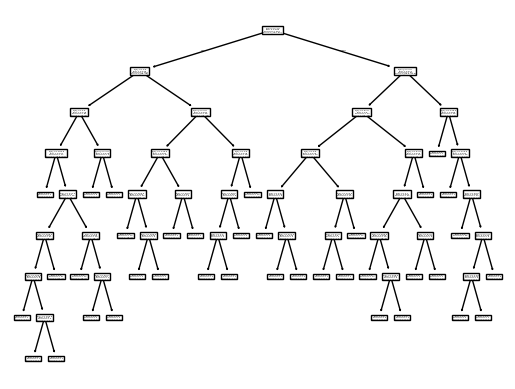

In [56]:
from sklearn import tree
tree.plot_tree(dt)

# For LabelEcoding the process are

In [57]:
from sklearn.preprocessing import LabelEncoder


In [58]:
df.head(4)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence


In [60]:
HeartDisease=LabelEncoder()

In [62]:
df["Heart Disease"]=HeartDisease.fit_transform(df["Heart Disease"])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [63]:
df.select_dtypes(include="object").isnull().sum()

Series([], dtype: float64)

In [64]:
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [65]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
